In [48]:
%matplotlib inline
import GEOparse
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklego.linear_model import LowessRegression
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)


geo = "GSE137140"

In [49]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Asakura2020", silent=True)

In [50]:
len(data.gsms)

3924

In [51]:
list(data.gsms.values())[0].metadata

{'title': ['BC0921'],
 'geo_accession': ['GSM4067570'],
 'status': ['Public on Mar 30 2020'],
 'submission_date': ['Sep 09 2019'],
 'last_update_date': ['Mar 30 2020'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['Serum'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['disease state: Non-cancer control',
  'Sex: Female',
  'age: 51',
  'tissue: serum'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was extracted each from 300uL serum samples using 3D-GeneÂ® RNA extraction reagent from liquid sample kit (Toray Industries, Inc.).'],
 'label_ch1': ['Cy5'],
 'label_protocol_ch1': ["miRNA was labeled using 3D-GeneÂ® miRNA Labeling kit in accordance with the manufacturer's instructions."],
 'hyb_protocol': ['Hybridized for 16 h at 32 ÂºC with rotary shaker (250 rpm). Hybridization buffer and washing protocol was attached in the 3D-GeneÂ® miRNA oligo chip kit.'],
 'scan_protocol': ['3D-GeneÂ® Scanner (Toray Indus

In [52]:
table = pd.concat((val.table.iloc[:,1:] for val in data.gsms.values() if "post" not in val.metadata["characteristics_ch1"][0]), axis=1).transpose()

In [54]:
table

,0,1,2,3,4,5,6,7,8,9,...,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564
VALUE,5.086708,-0.152745,5.699617,4.810065,7.077510,4.267692,5.513438,5.385192,-0.152745,4.934934,...,-0.152745,-0.152745,6.582185,-0.152745,-0.152745,4.938112,-0.152745,2.654567,4.112574,2.602682
VALUE,3.831208,-1.100220,1.357639,0.798168,5.545789,-1.240936,3.253886,-1.240936,-1.240936,7.023287,...,-1.240936,4.742660,6.539544,-1.240936,-1.240936,5.533134,-1.240936,5.276312,5.290079,-1.240936
VALUE,4.303555,3.255123,3.304892,2.073625,5.526403,4.088665,4.209212,3.790642,3.506570,4.020617,...,0.595680,4.290597,6.368346,-1.531527,2.461213,5.490590,-1.531527,5.206588,4.695193,2.353867
VALUE,6.330142,6.489444,4.727589,4.406777,6.778755,4.511448,5.884671,5.470259,0.530399,5.091586,...,0.530399,4.882286,7.445885,4.116002,5.000109,6.733061,4.511753,6.511228,6.433161,5.693330
VALUE,5.911772,2.738662,4.171431,0.853141,6.736975,5.749693,5.243776,0.853141,6.072689,6.497622,...,0.853141,0.853141,6.224340,0.853141,0.853141,0.853141,0.853141,0.853141,0.853141,0.853141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALUE,3.867679,3.501322,2.837191,0.665455,4.803604,1.130736,6.193152,0.416550,-0.498561,1.665464,...,-5.540565,4.763400,7.220702,-5.540565,3.089055,4.941072,-0.742389,4.942069,4.134535,-5.540565
VALUE,5.311947,4.073188,4.101201,2.118686,5.698477,2.344266,4.712554,0.785063,-4.417322,2.849492,...,-4.417322,5.446265,7.163131,-4.417322,2.154039,4.884964,-4.417322,4.718529,3.350626,-4.417322
VALUE,2.229432,2.674183,3.867016,3.424473,5.689167,3.830466,5.090698,1.019828,0.885724,6.267623,...,-4.324501,5.002374,7.283329,-4.324501,2.489638,5.280215,0.143643,4.764032,3.781309,-1.050319
VALUE,2.249489,-0.639963,0.423182,1.028599,5.844544,0.472641,5.284079,-0.795367,-4.017530,5.966505,...,-4.017530,4.996310,7.052476,-4.017530,1.278360,4.922518,-0.396838,4.909489,3.475894,-4.017530


In [55]:
np.mean(table)

0       1.310076
1       0.988022
2       2.638220
3       1.103019
4       6.023407
          ...   
2560    5.777744
2561    0.294645
2562    5.541667
2563    4.280672
2564    0.765179
Length: 2565, dtype: float64

In [56]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [57]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

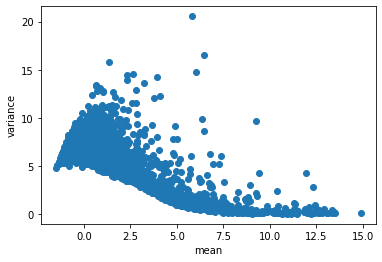

In [58]:
mean_variance_plot(table)

[]

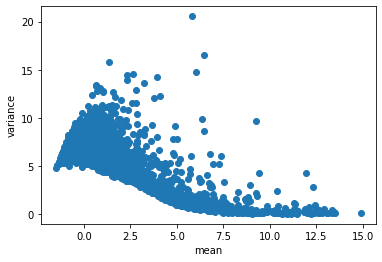

In [59]:
means, variances = get_means_and_variances(table)
plt.scatter(means, variances)
plt.xlabel("mean")
plt.ylabel("variance")
plt.plot()

### ANOVA

In [60]:
norm_log_table = table

In [61]:
controls = np.array(["control" in k.metadata["characteristics_ch1"][0] for k in list(data.gsms.values()) if "post" not in k.metadata["characteristics_ch1"][0]])

In [62]:
X = np.array(controls).reshape(-1, 1)

In [63]:
linreg = LinearRegression()
linreg.fit(X, norm_log_table)

LinearRegression()

In [64]:
fitted = linreg.predict(X)
explained_variance_score(norm_log_table, fitted, multioutput="variance_weighted")

0.20349151592600023

# PCA

In [65]:
pca = decomposition.PCA(n_components=2)

In [66]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [67]:
components = pca.transform(norm_log_table)

In [68]:
components

array([[  36.0617287 ,   -9.95351007],
       [  -7.18289716,  -22.8868511 ],
       [  38.37006772,  -11.06690171],
       ...,
       [ -93.05164332,   30.17241398],
       [-114.6998041 ,  -26.34240819],
       [ -27.05215022,  -10.70995887]])

In [69]:
sick = 1 - controls

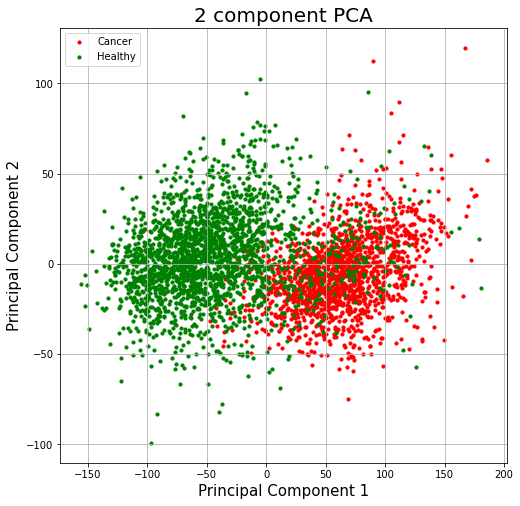

In [70]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

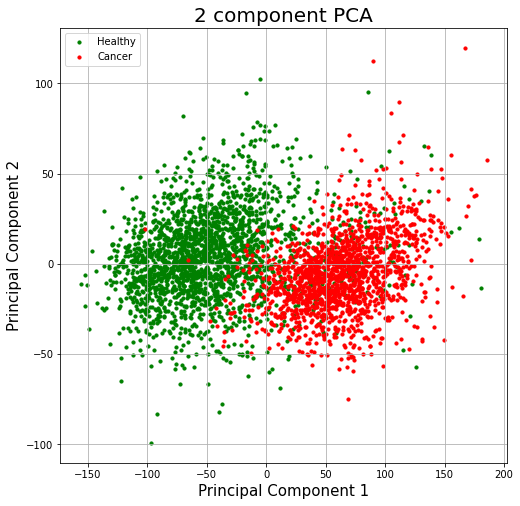

In [71]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy'][::-1]
colors = ['r', 'g']
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [72]:
sex = np.array(["Female" in k.metadata["characteristics_ch1"][1] for k in list(data.gsms.values()) if "post" not in k.metadata["characteristics_ch1"][0]])
age = np.array([float(k.metadata["characteristics_ch1"][2].split(" ")[1].replace("NA", "NaN")) for k in list(data.gsms.values()) if "post" not in k.metadata["characteristics_ch1"][0]])

In [73]:
covars = pd.DataFrame(np.array([sex, age]).transpose(), columns=["sex", "age"])

In [74]:
covars = covars.fillna(covars.mean())

In [75]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [76]:
adj_norm_log_table = norm_log_table# - linreg.predict(covars)

# PCA

In [77]:
pca = decomposition.PCA(n_components=2)

In [78]:
pca.fit(adj_norm_log_table)

PCA(n_components=2)

In [79]:
components = pca.transform(adj_norm_log_table)

In [80]:
components

array([[  36.0617287 ,   -9.95351022],
       [  -7.18289716,  -22.88685072],
       [  38.37006772,  -11.06690162],
       ...,
       [ -93.05164332,   30.17241407],
       [-114.6998041 ,  -26.34240836],
       [ -27.05215022,  -10.70995874]])

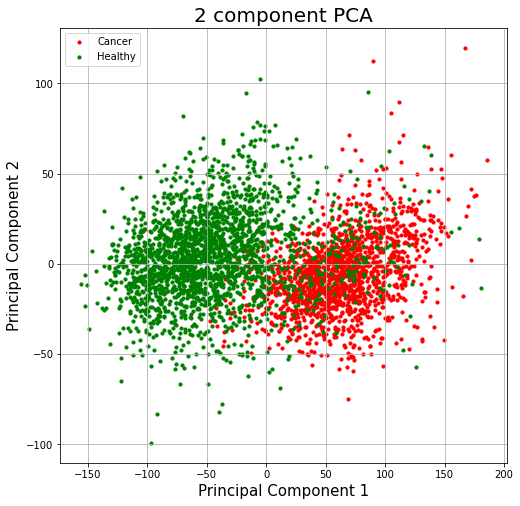

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### XGBoost

In [82]:
X_train, X_test, y_train, y_test = train_test_split(adj_norm_log_table, controls, test_size=0.33, random_state=42)

In [83]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[15:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


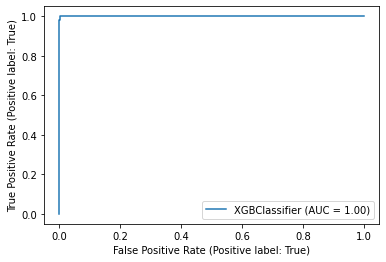

In [84]:
plot_roc_curve(model, X_test, y_test)

### Export data

In [85]:
mirnas = list(data.gsms.values())[0].table.iloc[:, 0]

In [86]:
from Scripts import converters

In [87]:
sequences = converters.mirbase_to_seq(mirnas)

In [88]:
adj_norm_log_table.columns = sequences
adj_norm_log_table["cancer"] = sick
adj_norm_log_table.head()

,CACUAGAUUGUGAGCUCCUGGA,AGGGCUUAGCUGCUUGUGAGCA,CAAAGCGCUCCCCUUUAGAGGU,AAAGUGCUUCCUUUUAGAGGG,UUUCAAGCCAGGGGGCGUUUUUC,AAGUGCUGUCAUAGCUGAGGUC,AGUGGGGAACCCUUCCAUGAGG,CAACCUGGAGGACUCCAUGCUG,AACUGUUUGCAGAGGAAACUGA,AAACCGUUACCAUUACUGAGUU,...,UCGCGCCCCGGCUCCCGUUC,UCGGGGAGUCUGGGGUCCGGAAU,AUCUGUCUCGAUUGUUUCCAG,UGGGGUAAGGAUAGGAGGGUCA,CCGCCUUCUCUCCUCCCCCAG,CAGAGGGAAUACAGAGGGCAAU,CCCAUGCCUCCUGCCGCGGUC,UAGGUGGCAGAGGAGGGACUUCA,GUGAGACUUCUCUCCCUUCAG,cancer
VALUE,5.086708,-0.152745,5.699617,4.810065,7.077510,4.267692,5.513438,5.385192,-0.152745,4.934934,...,-0.152745,6.582185,-0.152745,-0.152745,4.938112,-0.152745,2.654567,4.112574,2.602682,0
VALUE,3.831208,-1.100220,1.357639,0.798168,5.545789,-1.240936,3.253886,-1.240936,-1.240936,7.023287,...,4.742660,6.539544,-1.240936,-1.240936,5.533134,-1.240936,5.276312,5.290079,-1.240936,0
VALUE,4.303555,3.255123,3.304892,2.073625,5.526403,4.088665,4.209212,3.790642,3.506570,4.020617,...,4.290597,6.368346,-1.531527,2.461213,5.490590,-1.531527,5.206588,4.695193,2.353867,0
VALUE,6.330142,6.489444,4.727589,4.406777,6.778755,4.511448,5.884671,5.470259,0.530399,5.091586,...,4.882286,7.445885,4.116002,5.000109,6.733061,4.511753,6.511228,6.433161,5.693330,0
VALUE,5.911772,2.738662,4.171431,0.853141,6.736975,5.749693,5.243776,0.853141,6.072689,6.497622,...,0.853141,6.224340,0.853141,0.853141,0.853141,0.853141,0.853141,0.853141,0.853141,0


In [89]:
#norm_log_table.to_csv("../TransformedData/Asakura2020.csv", index=False)
adj_norm_log_table.to_csv("../TransformedData/Asakura2020_raw.csv", index=False)